In [1]:
from zipfile import ZipFile

with ZipFile("archive.zip") as f:
    f.extractall()

In [4]:
import os
for dirpath, dirnames, filenames in os.walk("Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Dataset'.
There are 4 directories and 0 images in 'Dataset/Testing'.
There are 0 directories and 100 images in 'Dataset/Testing/glioma_tumor'.
There are 0 directories and 115 images in 'Dataset/Testing/meningioma_tumor'.
There are 0 directories and 105 images in 'Dataset/Testing/no_tumor'.
There are 0 directories and 74 images in 'Dataset/Testing/pituitary_tumor'.
There are 4 directories and 0 images in 'Dataset/Training'.
There are 0 directories and 826 images in 'Dataset/Training/glioma_tumor'.
There are 0 directories and 822 images in 'Dataset/Training/meningioma_tumor'.
There are 0 directories and 395 images in 'Dataset/Training/no_tumor'.
There are 0 directories and 827 images in 'Dataset/Training/pituitary_tumor'.


In [7]:
####NO OF CLASSES
import pathlib

data_dir = pathlib.Path("Dataset/Training/")
class_names = [item.name for item in data_dir.glob("*")]
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + '/' + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"shape: {img.shape}")

    return img


shape: (512, 512, 3)
shape: (512, 512, 3)
shape: (273, 236, 3)
shape: (512, 512, 3)


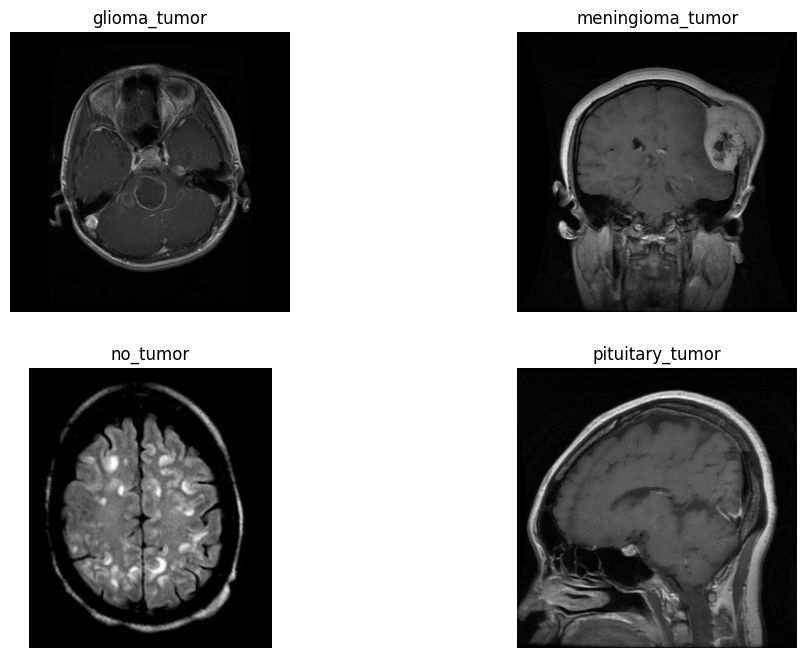

In [15]:

plt.figure(figsize=(12,8))
for i in range(0,4):
    plt.subplot(2, 2, i+1)
    img = view_random_image("Dataset/Training/", class_names[i])   


In [23]:
train_dir = "Dataset/Training"
test_dir = "Dataset/Testing"


In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=.1 )
test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")  # Specify the training subset

valid_data = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(256, 256),
                                                    class_mode="categorical",
                                                    batch_size=32,
                                                    subset="validation")  

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(256,256),
                                             class_mode="categorical",
                                             batch_size=32)

Found 2585 images belonging to 4 classes.


Found 285 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [53]:
train_data.next()[0].shape, train_data.next()[1].shape

((32, 256, 256, 3), (32, 4))

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
len(tf.config.list_physical_devices('GPU'))

1

In [60]:

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu" ),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(.5),

    Dense(4, activation="softmax")
])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


history = model.fit(train_data,
                    epochs=50,
                    batch_size=32,
                    validation_data=valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data))


Epoch 1/50
81/81 [==============================] - 11s 126ms/step - loss: 1.0431 - accuracy: 0.5625 - val_loss: 0.9436 - val_accuracy: 0.5649
Epoch 2/50
81/81 [==============================] - 9s 112ms/step - loss: 0.5892 - accuracy: 0.7578 - val_loss: 0.8210 - val_accuracy: 0.6737
Epoch 3/50
81/81 [==============================] - 9s 112ms/step - loss: 0.4285 - accuracy: 0.8228 - val_loss: 0.7949 - val_accuracy: 0.7158
Epoch 4/50
81/81 [==============================] - 9s 113ms/step - loss: 0.2854 - accuracy: 0.8867 - val_loss: 0.9235 - val_accuracy: 0.7018
Epoch 5/50
81/81 [==============================] - 9s 112ms/step - loss: 0.2178 - accuracy: 0.9153 - val_loss: 0.9011 - val_accuracy: 0.7228
Epoch 6/50
81/81 [==============================] - 9s 112ms/step - loss: 0.1529 - accuracy: 0.9470 - val_loss: 0.8527 - val_accuracy: 0.7579
Epoch 7/50
81/81 [==============================] - 9s 113ms/step - loss: 0.1370 - accuracy: 0.9435 - val_loss: 1.0387 - val_accuracy: 0.7754
Epoch

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.043131,0.562476,0.943600,0.564912
1,0.589163,0.757834,0.821015,0.673684
2,0.428534,0.822824,0.794935,0.715789
3,0.285445,0.886654,0.923523,0.701754
4,0.217774,0.915280,0.901123,0.722807


/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jinnn/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Axes: ylabel='loss'>

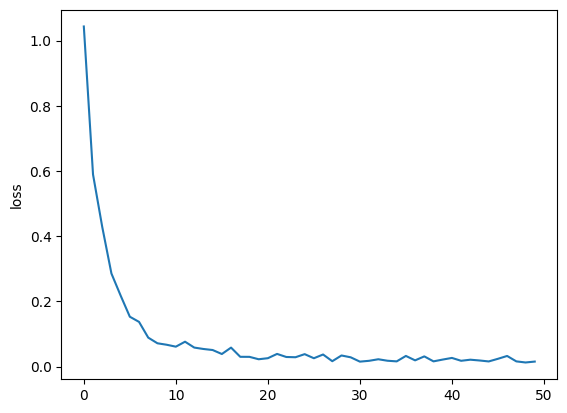

In [ ]:
sns.lineplot(x=history_df.index, y="loss", data=history_df)
sns.lineplot(x=history_df.index, y="val_loss", data=history_df)

### MODEL 2

In [79]:

model_2 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu" ),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu" ),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(.5),

    Dense(4, activation="softmax")
])

model_2.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


history_2 = model_2.fit(train_data,
                    epochs=50,
                    batch_size=32,
                    validation_data=valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data))


Epoch 1/50
81/81 [==============================] - 12s 122ms/step - loss: 1.2201 - accuracy: 0.4321 - val_loss: 1.1244 - val_accuracy: 0.4421
Epoch 2/50
81/81 [==============================] - 9s 114ms/step - loss: 0.8561 - accuracy: 0.6333 - val_loss: 1.0758 - val_accuracy: 0.5544
Epoch 3/50
81/81 [==============================] - 9s 113ms/step - loss: 0.6518 - accuracy: 0.6994 - val_loss: 0.9788 - val_accuracy: 0.6246
Epoch 4/50
81/81 [==============================] - 9s 114ms/step - loss: 0.5443 - accuracy: 0.7768 - val_loss: 0.9888 - val_accuracy: 0.5719
Epoch 5/50
81/81 [==============================] - 9s 114ms/step - loss: 0.4206 - accuracy: 0.8290 - val_loss: 0.9838 - val_accuracy: 0.6807
Epoch 6/50
81/81 [==============================] - 9s 114ms/step - loss: 0.3189 - accuracy: 0.8646 - val_loss: 0.9084 - val_accuracy: 0.7439
Epoch 7/50
81/81 [==============================] - 9s 114ms/step - loss: 0.2745 - accuracy: 0.9010 - val_loss: 0.9351 - val_accuracy: 0.7825
Epoch

#### DATA AUGMENTATION

In [98]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    validation_split=0.1,  # Fraction of training data to use for validation
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift image width by up to 20% of total width
    height_shift_range=0.2,  # Randomly shift image height by up to 20% of total height
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Randomly flip images vertically
    zoom_range=0.2,  # Randomly zoom into images by up to 20%
    shear_range=0.2,  # Randomly apply shear transformations
    fill_mode='nearest',  # Fill mode for pixel values near the edges
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")  

valid_data = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(256, 256),
                                                    class_mode="categorical",
                                                    batch_size=32,
                                                    subset="validation")  

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(256,256),
                                             class_mode="categorical",
                                             batch_size=32)

Found 2585 images belonging to 4 classes.


Found 285 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [101]:
from tensorflow.keras.optimizers import Adam

model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu" ),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation="relu" ),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(.5),

    Dense(4, activation="softmax")
])



model_3.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


history_3 = model_3.fit(train_data,
                    epochs=100,
                    batch_size=32,
                    validation_data=valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data))


Epoch 1/100


2023-10-01 23:14:25.399314: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 504.03MiB (rounded to 528515072)requested by op sequential_21/conv2d_114/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-10-01 23:14:25.399352: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-10-01 23:14:25.399362: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 278, Chunks in use: 277. 69.5KiB allocated for chunks. 69.2KiB in use in bin. 22.6KiB client-requested in use in bin.
2023-10-01 23:14:25.399370: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 157, Chunks in use: 157. 79.5KiB allocated for chunks. 79.5KiB in use in bin. 78.5KiB client-requested in use in bin.
2023-10-01 23:14:25.399377

ResourceExhaustedError: Graph execution error:

Detected at node sequential_21/conv2d_114/Relu defined at (most recent call last):
  File "/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/jinnn/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1046, in launch_instance

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/jinnn/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/jinnn/anaconda3/envs/tensorflow/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/jinnn/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/jinnn/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/jinnn/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/jinnn/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/jinnn/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/jinnn/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/jinnn/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_15112/1232941719.py", line 38, in <module>

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1126, in train_step

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/jinnn/.local/lib/python3.10/site-packages/keras/src/backend.py", line 5397, in relu

OOM when allocating tensor with shape[32,64,254,254] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_21/conv2d_114/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_82726]